# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [11]:
cities

['husavik',
 'uribia',
 'sitka',
 'tiksi',
 'bredasdorp',
 'taolanaro',
 'kidal',
 'carnarvon',
 'moose factory',
 'inhambane',
 'isangel',
 'saint-philippe',
 'cape town',
 'galle',
 'hilo',
 'jamestown',
 'hasaki',
 'tineo',
 'avarua',
 'barentsburg',
 'attawapiskat',
 'abonnema',
 'nome',
 'atuona',
 'rikitea',
 'solnechnyy',
 'hermanus',
 'mys shmidta',
 'kapaa',
 'ushuaia',
 'khatanga',
 'mataura',
 'columbia',
 'gawler',
 'castro',
 'busselton',
 'vaini',
 'leningradskiy',
 'bluff',
 'buritizeiro',
 'georgetown',
 'kalianget',
 'punta arenas',
 'saint george',
 'hami',
 'buluang',
 'chokurdakh',
 'port alfred',
 'hobart',
 'bengkulu',
 'olafsvik',
 'cueto',
 'cap malheureux',
 'general roca',
 'comodoro rivadavia',
 'lebu',
 'abu kamal',
 'rio grande',
 'kodiak',
 'grindavik',
 'sao felix do xingu',
 'kaitangata',
 'saskylakh',
 'meulaboh',
 'new norfolk',
 'zonguldak',
 'karaul',
 'tsihombe',
 'ouadda',
 'harrison',
 'los llanos de aridane',
 'yellowknife',
 'innisfail',
 'alban

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
#query_url = f"{url}units={units}&appid={weather_api_key}&q="

In [13]:
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="

In [14]:
city_data = []

In [15]:

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    response = requests.get(query_url + city).json()

    try:
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        city_data.append({"City": city, 
                        "Lat": city_lat,
                        "Lng": city_lng, 
                        "Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    except Exception as e:
        print(e)
        print("Not found. Skip")

Processing Record 1 of Set 1 | husavik
Processing Record 2 of Set 1 | uribia
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | taolanaro
'coord'
Not found. Skip
Processing Record 7 of Set 1 | kidal
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | moose factory
Processing Record 10 of Set 1 | inhambane
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | galle
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | tineo
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | barentsburg
'coord'
Not found. Skip
Processing Record 21 of Set 1 | attawapiskat
'coord'
Not found. Skip
Processing Record 22 of Set 1 | abonnema
Processing Record 23 of Set 1 | nome


In [16]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 62.1215,
        "lon": 39.3192
    },
    "dt": 1652036440,
    "id": 545467,
    "main": {
        "feels_like": 34.03,
        "grnd_level": 1003,
        "humidity": 88,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 37.54,
        "temp_max": 37.54,
        "temp_min": 37.54
    },
    "name": "Kon\u00ebvo",
    "sys": {
        "country": "RU",
        "sunrise": 1651970897,
        "sunset": 1652032210
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 28,
        "gust": 12.97,
        "speed": 4.47
    }
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date
0,husavik,66.0449,-17.3389,41.95,90,100,2.51,IS,1652035899
1,uribia,11.7139,-72.2660,90.66,51,53,14.43,CO,1652036171
2,sitka,57.0531,-135.3300,49.98,66,25,5.55,US,1652036172
3,tiksi,71.6872,128.8694,-0.26,100,88,4.34,RU,1652036151
4,bredasdorp,-34.5322,20.0403,55.24,87,98,1.95,ZA,1652036143


In [18]:
csv_file_path = city_df.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
high_humidity = city_df.loc[(city_df["Humidity"] > 100)].index

In [20]:
#  Get the indices of cities that have humidity over 100%.


In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(high_humidity, inplace=False)
clean_city_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date
0,husavik,66.0449,-17.3389,41.95,90,100,2.51,IS,1652035899
1,uribia,11.7139,-72.2660,90.66,51,53,14.43,CO,1652036171
2,sitka,57.0531,-135.3300,49.98,66,25,5.55,US,1652036172
3,tiksi,71.6872,128.8694,-0.26,100,88,4.34,RU,1652036151
4,bredasdorp,-34.5322,20.0403,55.24,87,98,1.95,ZA,1652036143
...,...,...,...,...,...,...,...,...,...
547,hovd,48.0056,91.6419,36.79,46,9,13.44,MN,1652036438
548,pizhanka,57.4604,48.5420,48.38,66,56,9.62,RU,1652036439
549,arman,59.7000,150.1667,32.95,82,83,5.12,RU,1652036439
550,kolobrzeg,54.1757,15.5834,49.15,84,6,11.43,PL,1652036440


In [22]:
clean_city_lat = clean_city_data["Lat"]
clean_city_lng = clean_city_data["Lng"]
clean_city_max_temp = clean_city_data["Temp"]
clean_city_humidity = clean_city_data["Humidity"]
clean_city_clouds = clean_city_data["Cloudiness"]
clean_city_wind = clean_city_data["Wind"]
clean_city_country = clean_city_data["Country"]
clean_city_date = clean_city_data["Date"]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

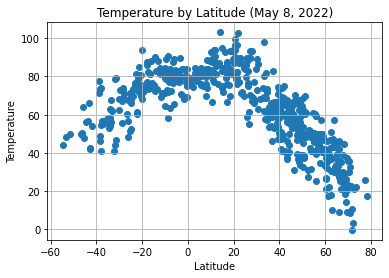

In [23]:
plt.scatter(clean_city_lat, clean_city_max_temp, marker="o")

# Incorporate the other graph properties
plt.title("Temperature by Latitude (May 8, 2022)")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("all_temp_lat.png")

From the image above we see that as you get closer to a latitude of 0, the warmer it gets and the further away from 0 the cooler it gets.

## Latitude vs. Humidity Plot

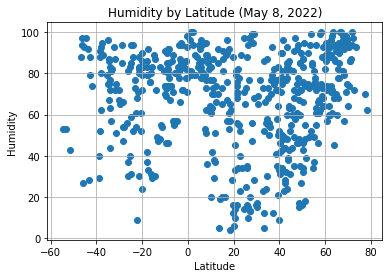

In [24]:
plt.scatter(clean_city_lat, clean_city_humidity, marker="o")

# Incorporate the other graph properties
plt.title("Humidity by Latitude (May 8, 2022)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("all_humidity_lat.png")

From the image above we see that as you get closer to a latitude of 0, the range of humidity is wider and the further away from 0 the lower the range of humidity there is. 

## Latitude vs. Cloudiness Plot

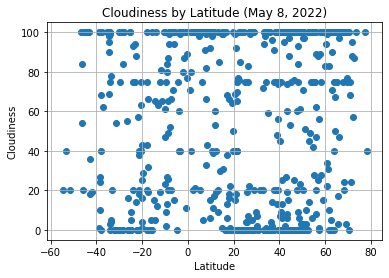

In [25]:
plt.scatter(clean_city_lat, clean_city_clouds, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness by Latitude (May 8, 2022)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("all_cloudiness_lat.png")

From the image above we see that as you get closer to a latitude of 0, there is a higher likelihood that there will be clouds and the further away from 0 the likelihood of having 0-100% cloudiness.

## Latitude vs. Wind Speed Plot

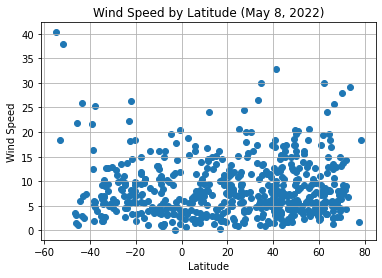

In [26]:
plt.scatter(clean_city_lat, clean_city_wind, marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed by Latitude (May 8, 2022)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("all_wind_lat.png")

## Linear Regression

In [27]:
Northern_Hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
Northern_Hemisphere.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date
0,husavik,66.0449,-17.3389,41.95,90,100,2.51,IS,1652035899
1,uribia,11.7139,-72.2660,90.66,51,53,14.43,CO,1652036171
2,sitka,57.0531,-135.3300,49.98,66,25,5.55,US,1652036172
3,tiksi,71.6872,128.8694,-0.26,100,88,4.34,RU,1652036151
5,kidal,18.4411,1.4078,93.20,4,0,11.30,ML,1652036173


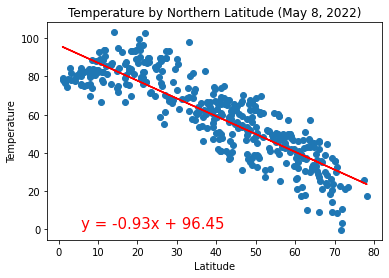

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Temperature by Northern Latitude (May 8, 2022)")
plt.show()
plt.savefig("north_temp_lat.png")

There appears to be a negative correlation between the temperature and latitude, as latitude increases temperature decreases. 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
Southern_Hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
Southern_Hemisphere.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date
4,bredasdorp,-34.5322,20.0403,55.24,87,98,1.95,ZA,1652036143
6,carnarvon,-24.8667,113.6333,66.27,94,0,9.22,AU,1652035772
8,inhambane,-23.8650,35.3833,73.38,94,20,4.61,MZ,1652035911
9,isangel,-19.5500,169.2667,71.71,83,29,3.44,VU,1652035967
10,saint-philippe,-21.3585,55.7679,72.99,82,38,7.74,RE,1652036175


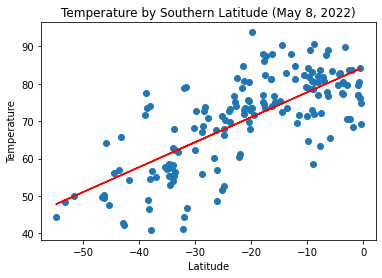

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Temperature by Southern Latitude (May 8, 2022)")
plt.show()
plt.savefig("south_temp_lat.png")

There appears to be a positive correlation between the temperature and latitude, as latitude increases temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

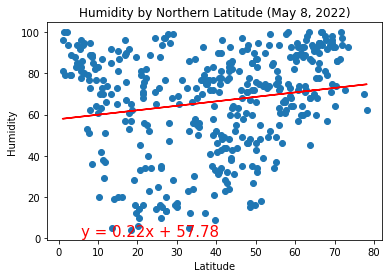

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity by Northern Latitude (May 8, 2022)")
plt.show()
plt.savefig("north_humidity_lat.png")

There appears to be a slight positive correlation between the humidity and latitude, as latitude increases humidity is slightly more prevelant.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

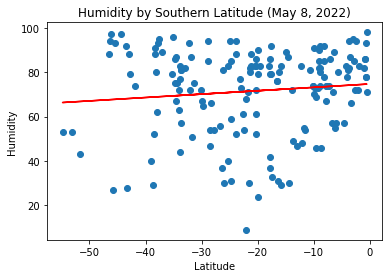

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity by Southern Latitude (May 8, 2022)")
plt.show()
plt.savefig("south_humidity_lat.png")

There appears to be a slight correlation between the humidity and latitude, as latitude decreases humidity is slightly more prevelant.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

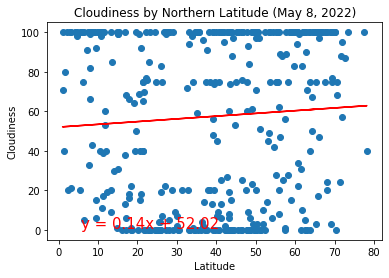

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness by Northern Latitude (May 8, 2022)")
plt.show()
plt.savefig("north_cloudiness_lat.png")

There appears to be no strong correlation between the cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

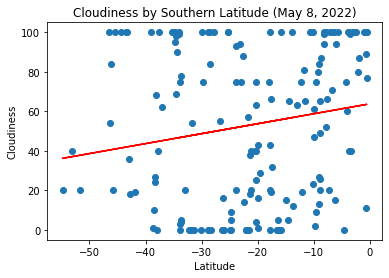

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness by Southern Latitude (May 8, 2022)")
plt.show()
plt.savefig("south_cloudiness_lat.png")

There appears to be no strong correlation between the cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

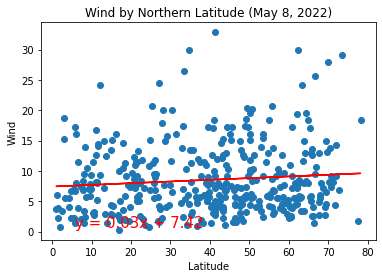

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.title("Wind by Northern Latitude (May 8, 2022)")
plt.show()
plt.savefig("north_wind_lat.png")

There appears to be no strong correlation between the wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

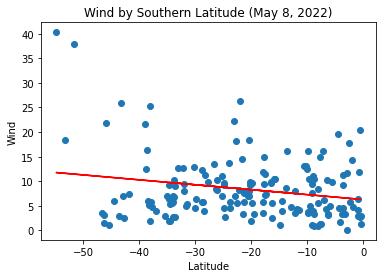

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.title("Wind by Southern Latitude (May 8, 2022)")
plt.show()
plt.savefig("south_wind_lat.png")

There appears to be no strong correlation between the wind speed and latitude.

## Observable Trends:
From the data, it is clear that there are higher temperatures near the equator, or at a latitude equal or near 0, and cooler temperatures as one migrates away from the equator both in towards the northern and southern hemispheres. There is a high probability that the humidity will be high near the equator. It is also likely that there will be clouds near the equator. 